# Dynamic Time Warping

### Importing Required Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
from matplotlib.patches import ConnectionPatch
import plotly.graph_objects as go

### Dynamic Time Warping Function

In [2]:
# For reference: https://github.com/kamperh/lecture_dtw_notebook
def dp(dist_mat):
    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

### Data Collection

##### Data File: 06 Feb 2024
##### Time interval: 2024-02-06 02:34:55.870 : 2024-02-06 23:59:59.420

### Importing Data File

In [4]:
# Reading csv file
df = pd.read_csv(r"C:\Users\91780\Desktop\IIT bhilai internship\Code\Githubrepocode.ipynb\Dataset\Signals_for_attension_based_torque_model_csv.csv")
motif = pd.read_csv(r"C:\Users\91780\Desktop\IIT bhilai internship\Code\Githubrepocode.ipynb\Dataset\12mm_Motifs_Data_Complete.csv")

input_signals = ['[9.226]','[12:44]','[9:12]','[9:13]','[9:14]','[9:15]','[9:16]','[9:17]','[9:47]','[9:48]','[9:49]','[9:50]',
'[9:51]','[9:52]','[9:53]','[9:54]','[9:55]','[9:56]','[9:57]','[9:58]','[9:64]','[9:65]','[9:66]','[9:67]','[9:68]','[9:69]',
'[12:42]','[12:43]','[12:65]','[12:66]','[12:67]','[12:68]','[11:21]','[11:22]','[11:23]','[11:24]','[11:25]','[11:26]',
'[9:41]','[9:42]','[9:43]','[9:44]','[9:45]','[9:46]','[9:61]','[9:62]','[9:63]','[9:9]','[9:10]','[9:11]','[11:18]',
'[11:19]','[11:20]','[12:62]','[12:63]','[12:64]','[13:0]','[9:76]','[12:19]','[12:20]','[12:21]','[12:69]']

df = df[input_signals]
motif = motif[input_signals]

### DTW for Stand 13 Torque '[9:12]'

In [5]:
x = df['[9:12]']
Y = motif['[9:12]']

#### Only considering for 800 seconds for easy understanding

In [8]:
x = x.iloc[:800]
y = []
for i in range(10):
    y.extend(Y)

#### Visualization of two time series

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x.index,
                         y=x,
                         mode='lines',
                         line_color='grey',
                         name="original data"))

fig.add_trace(go.Scatter(x=x.index,
                         y=y,
                         mode='lines',
                         name="motif"))
fig.update_layout(
    title=f'Stand 13 torque',
    xaxis_title='time',
    yaxis_title='[9:12]',
    showlegend=True
)

fig.show()

#### Calculating Shortest-path and Cost-matrix

In [13]:
# Distance matrix: A two-dimensional matrix where each element represents the distance between elements of two time series
N = x.shape[0]
M = len(y)
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])
print(dist_mat)

[[22. 23. 22. ...  5.  1.  4.]
 [19. 20. 19. ...  2.  2.  1.]
 [22. 23. 22. ...  5.  1.  4.]
 ...
 [22. 23. 22. ...  5.  1.  4.]
 [21. 22. 21. ...  4.  0.  3.]
 [21. 22. 21. ...  4.  0.  3.]]


Alignment cost: 2500.0000
Normalized alignment cost: 1.5625


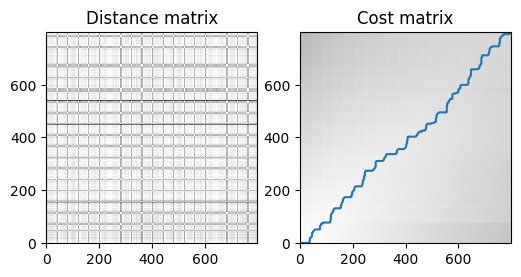

In [14]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path)

In [16]:
import plotly.express as px

fig = go.Figure()
for x_i, y_j in path:
    fig.add_trace(go.Scatter(x=[x_i, y_j], 
                             y=[x[x_i], y[y_j]], 
                             line_color="grey"))
    
fig.add_trace(go.Scatter(x=x.index,
                         y=x,
                         mode='lines',
                         line_color='blue',
                         name="original data"))

fig.add_trace(go.Scatter(x=x.index,
                         y=y,
                         mode='lines',
                         line_color='red',
                         name="motif"))
    
# fig.add_trace(go.Scatter(x=orig.iloc[:800],
#                          y=ser_motif,
#                          mode='lines',
#                          line_color='grey',
#                          name="original data"))

fig.update_layout(
    title=f'Stand 16 current',
    xaxis_title='time',
    yaxis_title='[12:42]',
    showlegend=True
)

fig.show()
fig.write_html("file_name_to_save_the_html_file")